<a href="https://colab.research.google.com/github/herreraskarina/Exercises/blob/main/GitHub_Multinomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Logistic Regression

For this activity a dataset on patient heart metrics will be used, with the aim of determining whether the patient is normal, suspected or has a pathological disease. The dataset can be found at [GitHub](https://raw.githubusercontent.com/bkrai/R-files-from-YouTube/main/Cardiotocographic.csv).

Below is the data dictionary:

* LB: baseline value (SisPorto)
* AC: accelerations (SisPorto)
* FM: foetal movement (SisPorto)
* UC: uterine contractions (SisPorto)
* DL: light decelerations
* DS: severe decelerations
* DP: prolongued decelerations
* ASTV: percentage of time with abnormal short term variability (SisPorto)
* mSTV: mean value of short term variability (SisPorto)
* ALTV: percentage of time with abnormal long term variability (SisPorto)
* mLTV: mean value of long term variability (SisPorto)
* Width: histogram width
* Min: low freq. of the histogram
* Max: high freq. of the histogram
* Nmax: number of histogram peaks
* Nzeros: number of histogram zeros
* Mode: histogram mode
* Mean: histogram mean
* Median: histogram median
* Variance: histogram variance
* Tendency: histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric
* NSP: Normal=0; Suspect=1; Pathologic=2


The objective is to understand/predict the `NSP` variable according to the others.

Obs: This exercise is focused on building the logistic regression model without considering the expert knowledge behind the variables.

## Activity 1: Import the dataset, check for missing data and the correlation between variables.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# importing data
from google.colab import drive
drive.mount('/content/drive')
# creating dataset
df = pd.read_excel('/content/drive/MyDrive/cardio.xlsx')
df.head()

Mounted at /content/drive


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [4]:
# checking basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [5]:
# checking how many null data there are in the dataset
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

In [6]:
# observing the values of the variables
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,0.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,0.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,0.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,0.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,0.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,2.000000


In [7]:
# observing the correlation between variables
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
LB,1.000000,-0.080862,-0.033350,-0.146372,-0.158845,-0.054799,-0.105236,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
AC,-0.080862,1.000000,0.046949,0.086653,-0.110934,-0.043733,-0.131007,-0.280089,0.207595,-0.374335,...,-0.154934,0.393712,0.189319,-0.006412,0.243845,0.270496,0.272948,0.126380,0.029341,-0.363849
FM,-0.033350,0.046949,1.000000,-0.069981,0.050401,-0.010824,0.265627,-0.103721,0.121213,-0.074190,...,-0.153883,0.099619,0.164450,-0.017855,-0.061042,-0.089502,-0.072175,0.179309,-0.001295,0.087933
UC,-0.146372,0.086653,-0.069981,1.000000,0.287032,0.006751,0.087898,-0.229072,0.286907,-0.308000,...,-0.111860,0.120195,0.081860,0.057815,-0.106559,-0.190340,-0.142111,0.238755,-0.074167,-0.203824
DL,-0.158845,-0.110934,0.050401,0.287032,1.000000,0.115216,0.231103,-0.117416,0.563260,-0.272250,...,-0.553921,0.217002,0.397183,0.235296,-0.350232,-0.530564,-0.390822,0.567483,-0.000102,0.062702
DS,-0.054799,-0.043733,-0.010824,0.006751,0.115216,1.000000,0.009848,0.037306,0.034632,-0.030506,...,-0.071670,-0.021600,0.006892,0.049462,-0.216356,-0.162154,-0.165038,0.132999,-0.074977,0.135629
DP,-0.105236,-0.131007,0.265627,0.087898,0.231103,0.009848,1.000000,0.048813,0.268688,-0.138521,...,-0.278293,0.120019,0.221066,0.057278,-0.437137,-0.492250,-0.448311,0.505023,-0.218177,0.488277
ASTV,0.305570,-0.280089,-0.103721,-0.229072,-0.117416,0.037306,0.048813,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
MSTV,-0.279607,0.207595,0.121213,0.286907,0.563260,0.034632,0.268688,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
ALTV,0.285630,-0.374335,-0.074190,-0.308000,-0.272250,-0.030506,-0.138521,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


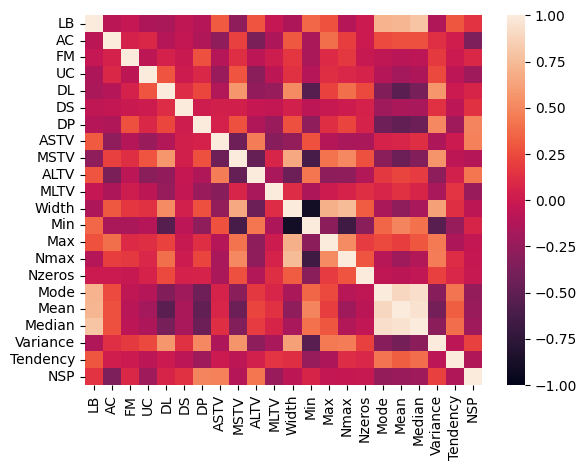

In [8]:
# observing the correlation between variables with heat map
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=False);

**Comments**:

* The dataset has 2126 rows and 22 columns
* No null data
* Weak correlation is observed between most variables, as most values are close to 0 (colors closer to red), with the exception of the variables Mode, Mean and Median (where there is a strong positive correlation) and some others ( e.g., Width x Min, Min x NMax, where there is a strong negative correlation)
* It would be interesting to remove variables with high correlation with others. When two variables are highly correlated, it means they behave in a similar way. In this case, only the presence of one of them is enough for the model. The threshold chosen to remove variables with high correlation was a correlation above 0.6 (absolute).

In [9]:
# selecting variables that have a high correlation with each other
def correlation(dataframe, threshold):
    corr_matrix = dataframe.corr().abs()
    cols_to_return = set()
    # Iterando sobre a matriz de correlação
    for i in range(corr_matrix.shape[0]):
        for j in range(i, corr_matrix.shape[1]):
            if i == j:
                continue
            if corr_matrix.iloc[i, j] > threshold:
                cols_to_return.add(corr_matrix.columns[j])

    return list(cols_to_return)
corr_cols = correlation(df, 0.6)

# printing the columns that can be dropped due to correlation
print(corr_cols)

['Nmax', 'Variance', 'Max', 'Median', 'Mean', 'Mode', 'Min', 'Width']


In [10]:
# creating X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
# dropping columns with high correlation between each other
X.drop(labels=corr_cols, axis=1, inplace=True)

## Activity 2: Check if the variable is balanced.

<Axes: xlabel='NSP', ylabel='count'>

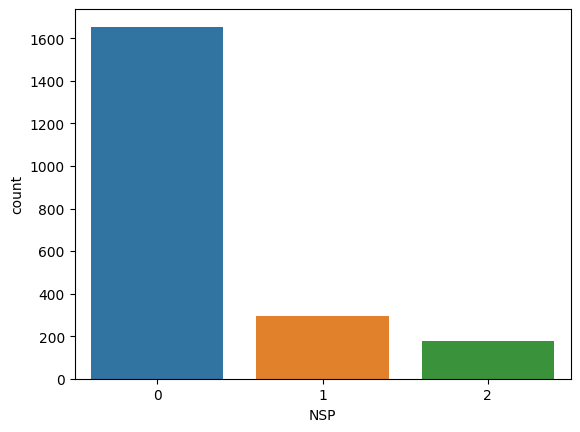

In [12]:
# checking the balance of the NSP variable
sns.countplot(x=df['NSP'])

In [13]:
# balancing NSP classes with the SMOTE technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X, y = smote.fit_resample(X, y)

print(X.shape)

(4965, 13)


<Axes: xlabel='NSP', ylabel='count'>

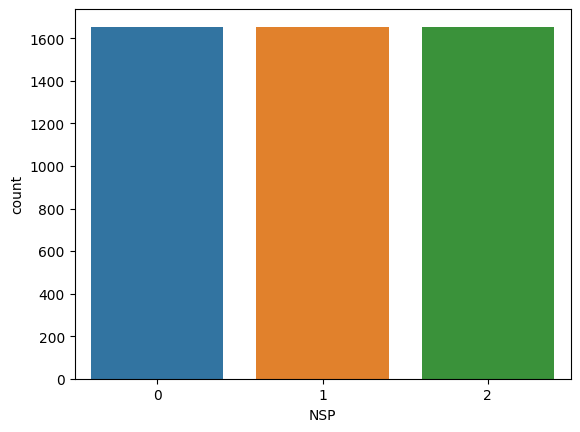

In [14]:
# checking the balance of the NSP variable after treatment
sns.countplot(x=y)

In [15]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Nzeros,Tendency
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,0,1
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,1,0
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,1,0
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,0,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,0,1


In [16]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: NSP, dtype: int64

## Activity 3: Create a logistic regression model.

In [17]:
# importing the function to create the model
from statsmodels.discrete.discrete_model import MNLogit

# adding the constant
X = sm.add_constant(X)

# creting model
modelo = MNLogit(y, X).fit()

         Current function value: 0.387033
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
# observing the probability of each line belonging to each class/category
modelo.predict(X)

,0,1,2
0,0.255431,0.378177,3.663916e-01
1,0.999668,0.000332,1.716745e-08
2,0.997023,0.002977,2.680033e-07
3,0.994851,0.005149,3.211673e-07
4,0.999845,0.000155,1.200791e-09
...,...,...,...
4960,0.002166,0.407612,5.902223e-01
4961,0.005183,0.175156,8.196611e-01
4962,0.000129,0.001694,9.981773e-01
4963,0.000081,0.034890,9.650281e-01


In [19]:
# showing which class/category each line belongs to
# also creating the variable that will store the predicted values
y_pred = modelo.predict(X).idxmax(axis=1)
y_pred

0       1
1       0
2       0
3       0
4       0
       ..
4960    2
4961    2
4962    2
4963    2
4964    2
Length: 4965, dtype: int64

In [20]:
# observing the model coefficients
print(modelo.summary())

                          MNLogit Regression Results                          
Dep. Variable:                    NSP   No. Observations:                 4965
Model:                        MNLogit   Df Residuals:                     4937
Method:                           MLE   Df Model:                           26
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                  0.6477
Time:                        15:30:23   Log-Likelihood:                -1921.6
converged:                      False   LL-Null:                       -5454.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
     NSP=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.0956      1.118    -15.292      0.000     -19.287     -14.905
LB             0.1119      0.007     15.164      0.000       0.097       0.126
AC          -748.0520     57.020    -13.119      0.0

In [21]:
modelo.params

,0,1
const,-17.095611,-24.545351
LB,0.111905,0.063548
AC,-748.052041,-972.539254
FM,7.384378,16.853595
UC,-187.169389,-161.827336
DL,9.837914,542.348159
DS,-4766.343773,69678.618438
DP,2410.964032,4701.981700
ASTV,0.053513,0.199528
MSTV,-0.646112,0.064843


## Activity 4: Make predictions and evaluate the model.

In [22]:
# predictions
y_pred

0       1
1       0
2       0
3       0
4       0
       ..
4960    2
4961    2
4962    2
4963    2
4964    2
Length: 4965, dtype: int64

In [23]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[1410,  198,   47],
       [  99, 1393,  163],
       [  24,  241, 1390]])

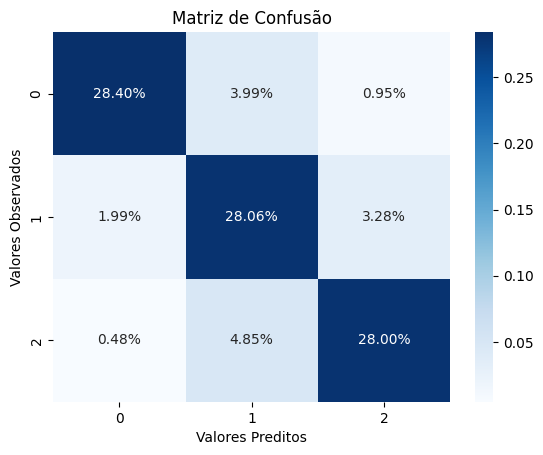

In [24]:
# observing the percentage of success (confusion matrix) in each class with heatmap
sns.heatmap(matriz_confusao/np.sum(matriz_confusao), cmap='Blues',
            annot=True, fmt='.2%')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Observados');

In [25]:
# checking metrics
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1655
           1       0.76      0.84      0.80      1655
           2       0.87      0.84      0.85      1655

    accuracy                           0.84      4965
   macro avg       0.85      0.84      0.85      4965
weighted avg       0.85      0.84      0.85      4965



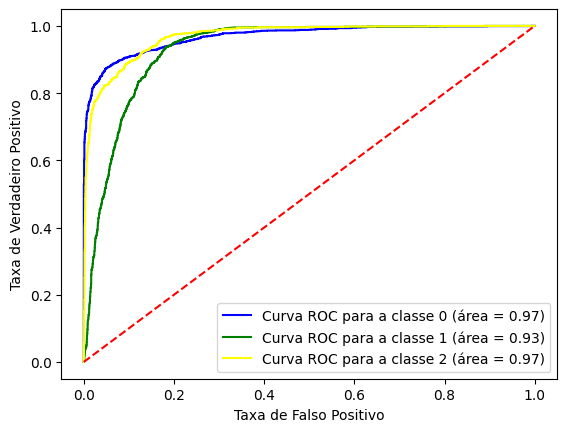

In [26]:
# ROC curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_cat = label_binarize(y, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
colors = ['blue', 'green', 'yellow']

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_cat[:,i], modelo.predict(X).iloc[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])

for i, color in zip(range(n_classes), colors):
  plt.plot(fpr[i], tpr[i], color=color,
           label=f'Curva ROC para a classe {i} (área = {round(roc_auc[i], 2)})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend(loc='lower right');

**Comments**: The confusion matrix and heatmap show that the model was able to correctly predict almost 85% of the values correctly. The metrics show that the model is 85% accurate, with the precision of each category being quite high. The other metrics have equally high values, which indicates that the model is good. According to the ROC curve graph, the curves of the three categories are very close to 1, with the area of class 1 having a worse performance in relation to the other two (which means that the model is able to predict fewer people with suspected disease ), despite still having a high value. This means the model is good.

## Activity 5: Make a prediction for a patient who presents the following characteristics:

* `LB` = 121
* `AC` = 0.004176
* `FM` = 0.0
* `UC` = 0.007541
* `DL` = 0.003176
* `DS` = 0.0
* `DP` = 0.0
* `ASTV` = 20
* `mSTV` = 2.3
* `ALTV` = 0
* `mLTV` = 11.5
* `Width` = 129
* `Min` = 54
* `Max` = 171
* `Nmax` = 5
* `Nzeros` = 0
* `Mode` = 140
* `Mean` = 136
* `Median` = 123
* `Variance` = 14
* `Tendency` = 1

In [27]:
predicoes = modelo.predict([1, 121, 0.004176, 0.0, 0.007541, 0.003176, 0.0, 0.0, 20, 2.3, 0, 11.5, 0, 1])
predicoes

array([[9.99779141e-01, 2.20807049e-04, 5.14838349e-08]])

**Answer**: The patient with the above characteristics has a 99% chance of belonging to class 0, that is, being a normal patient.